In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel as C
import matplotlib.pyplot as plt
from core.vhgpr import VHGPR
from fourbranches import S, f, r
from core.inputs import GaussianInputs
import time

In [3]:
plt.rcParams.update({'font.size': 16})

In [4]:
def plot_prediction(vhgp):
    x = np.linspace(-5, 5, 80)
    y = np.linspace(-5, 5, 80)
    meshx, meshy = np.meshgrid(x,y)
    truefuncf = [[f(np.array([[j,i]]))[0] for j in x]for i in y]
    truefuncg = [[r(np.array([[j,i]]))[0] for j in x]for i in y]
    meshsample = np.array([[[j,i] for j in x] for i in y])
    predresults = vhgp.predict(meshsample.reshape(6400,2))
    
    predfuncf = predresults[0].reshape(80,80)
    predfuncg = np.sqrt(np.exp(predresults[2].reshape(80,80)))
    plt.figure(figsize = (4,4))
    axes1 = plt.contour(meshx, meshy, truefuncf, colors = "Black")
    axes2 = plt.contour(meshx, meshy, predfuncf, colors = "Red")
    plt.clabel(axes1)
    plt.clabel(axes2)
    plt.title('mean')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

    plt.figure(figsize = (4,4))
    axes1 = plt.contour(meshx, meshy, truefuncg, colors = "Black")
    axes2 = plt.contour(meshx, meshy, predfuncg, colors = "Red")
    plt.plot(DX[:,0],DX[:,1],'o', markersize=3)
    plt.clabel(axes1)
    plt.clabel(axes2)
    plt.title('std')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

In [5]:
dim = 2                                 
mean, cov = np.zeros(dim), np.eye(dim) 
domain = np.array([[-5,5]]*dim)
inputs = GaussianInputs(mean, cov, domain, dim)

In [6]:
np.random.seed(0)
DX = inputs.sampling(300, True)
DY = S(DX)

In [7]:
kernelf = C(10.0, (1e-1, 1e2)) * RBF((5), (1e-1, 1e2)) 
kernelg = C(2, (1e-1, 1e1)) * RBF((2), (1e-1, 1e1))
vhgpr = VHGPR(kernelf, kernelg)
vhgpr.fit(DX, DY)

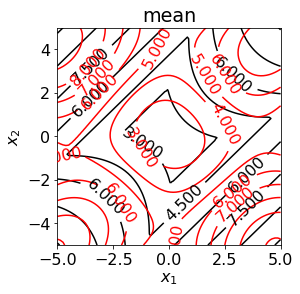

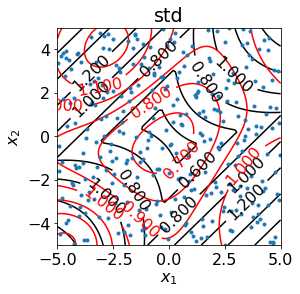

In [8]:
plot_prediction(vhgpr)